<a href="https://colab.research.google.com/github/thavs-college-repos/TF-201724423-20201A963-201916314/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicializar variables

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
f = open('.mapbox_token', "w+")
f.write('pk.eyJ1IjoidTIwMTcyNDQyMyIsImEiOiJjbDN2eHZpaDgwMHdrM2txcHd5YzlwempxIn0.iDkPaJgRqFMJjiBW8_gVEQ')
f.close()

px.set_mapbox_access_token(open(".mapbox_token").read())

In [ ]:
calles_file = "Lima-calles.csv"
intersection_file = "Lima-intersecciones.csv"

In [ ]:
columns = ['id','name','intersection_count']
calles_df = pd.read_csv(calles_file, sep=";", header=None, names=columns)

In [ ]:
columns = ['id', 'calle_id','calle_name', 'start_id', 'end_id', 
           'int_start_id', 'int_end_id', 'distancia', 'velocidad', 
           'costo', 'costo_inverso', 'start_lat', 'start_log', 
           'end_lat', 'end_log']
df = pd.read_csv(intersection_file, sep=";", header=None, names=columns)
df.head()

,id,calle_id,calle_name,start_id,end_id,int_start_id,int_end_id,distancia,velocidad,costo,costo_inverso,start_lat,start_log,end_lat,end_log
0,1,4827820,Plaza 2 de Mayo,31035122,31035142,1,6,0.038973,70,0.000557,1000000.0,-12.045931,-77.042783,-12.046096,-77.043090
1,2,4827820,Plaza 2 de Mayo,31035142,31035109,6,90275,0.004040,70,0.000058,1000000.0,-12.046096,-77.043090,-12.046125,-77.043111
2,3,4827820,Plaza 2 de Mayo,31035109,31035110,90275,79,0.018227,70,0.000260,1000000.0,-12.046125,-77.043111,-12.046277,-77.043175
3,4,4827820,Plaza 2 de Mayo,31035110,31035112,79,51668,0.037674,70,0.000538,1000000.0,-12.046277,-77.043175,-12.046603,-77.043112
4,5,4827820,Plaza 2 de Mayo,31035112,31035113,51668,7,0.010827,70,0.000155,1000000.0,-12.046603,-77.043112,-12.046678,-77.043048


In [ ]:
graph_df = df.iloc[:3000]

fig = px.line_mapbox(graph_df, lat="start_lat", lon="start_log", line_group="calle_id",hover_name='calle_name', zoom=12)
fig.show()

In [ ]:
fig = px.scatter_mapbox(df, lat="start_lat", lon="start_log", zoom=12)
fig.show()

#Latitud

---



In [ ]:
crr = df[['calle_id', 'start_lat', 'start_log', 'end_lat', 'end_log', 'distancia', 'velocidad', 'costo']].copy()
crr['start'] = crr[['start_lat', 'start_log']].apply(lambda x: (x[0], x[1]), axis=1)
crr['end'] = crr[['end_lat', 'end_log']].apply(lambda x: (x[0], x[1]), axis=1)

In [ ]:
a = crr.groupby(["calle_id"])['start'].apply(set)
b = crr.groupby(["calle_id"])['end'].apply(set)
c = crr.groupby(["calle_id"])['distancia'].sum()
d = crr.groupby(["calle_id"])['velocidad'].mean()
e = crr.groupby(["calle_id"])['costo'].mean()

inter = pd.DataFrame(a).join(b, on='calle_id').join(c, on='calle_id').join(d, on='calle_id').join(e, on='calle_id')
inter['id'] = [x[0] for x in inter.iterrows()]

In [ ]:
cols = ['start', 'end']

def add_set(start, end):
  for i in end:
    start.add(i)
  
  return start

inter['combined'] = inter[cols].apply(
    lambda row: add_set(row.values[0], row.values[1]), axis=1)

In [ ]:
inter.describe()

,distancia,velocidad,costo,id
count,20767.000000,20767.000000,20767.000000,2.076700e+04
mean,0.371320,41.865460,0.002289,9.933223e+07
std,0.645862,7.389535,0.001733,3.892289e+07
min,0.002142,20.000000,0.000053,4.827820e+06
25%,0.107850,40.000000,0.001366,7.107024e+07
50%,0.207418,40.000000,0.001894,1.119132e+08
75%,0.405625,40.000000,0.002704,1.119675e+08
max,18.574274,120.000000,0.047652,2.500301e+08


In [ ]:
new_df = inter[['id', 'distancia', 'velocidad', 'costo']].copy()
start = []
end = []

for row in inter.itertuples():
    start.append([ id
              for x, id in zip(inter['combined'], inter['id'])  
              if len(x.intersection(row.combined)) > 0 and id != row.id])

In [ ]:
new_df['paths'] = start
#new_df['end'] = end
new_df
new_df.head()

,id,distancia,velocidad,costo,paths
calle_id,,,,,
4827820,4827820,0.303198,70.0,0.000394,"[4827827, 4827828, 4828025, 28316968, 28317001..."
4827822,4827822,0.034784,70.0,0.000497,"[144954706, 157935082]"
4827827,4827827,1.467760,70.0,0.001398,"[4827820, 4827843, 27455459, 28316933, 2831696..."
4827828,4827828,1.459433,70.0,0.001737,"[4827820, 4827843, 42211168, 42213129, 7522693..."
4827829,4827829,0.285529,60.0,0.001190,"[4827838, 4827844, 111888318, 111925865, 14495..."


In [ ]:
G = nx.Graph()
for row in new_df.itertuples():
  for id in row.paths:
    G.add_edge(row.id, id)

print(G)

Graph with 20094 nodes and 42352 edges


In [ ]:
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
density = nx.density(G)
transitivity = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)
print("Number of Nodes: %s" % num_nodes)
print("Number of Edges: %s" % num_edges)
print("Density: %s" % density)
print("Transitivity: %s" % transitivity)
print("Avg. Clustering: %s" % avg_clustering)

Number of Nodes: 20094
Number of Edges: 42352
Density: 0.00020979384252793536
Transitivity: 0.06584298384910338
Avg. Clustering: 0.1278090682693691


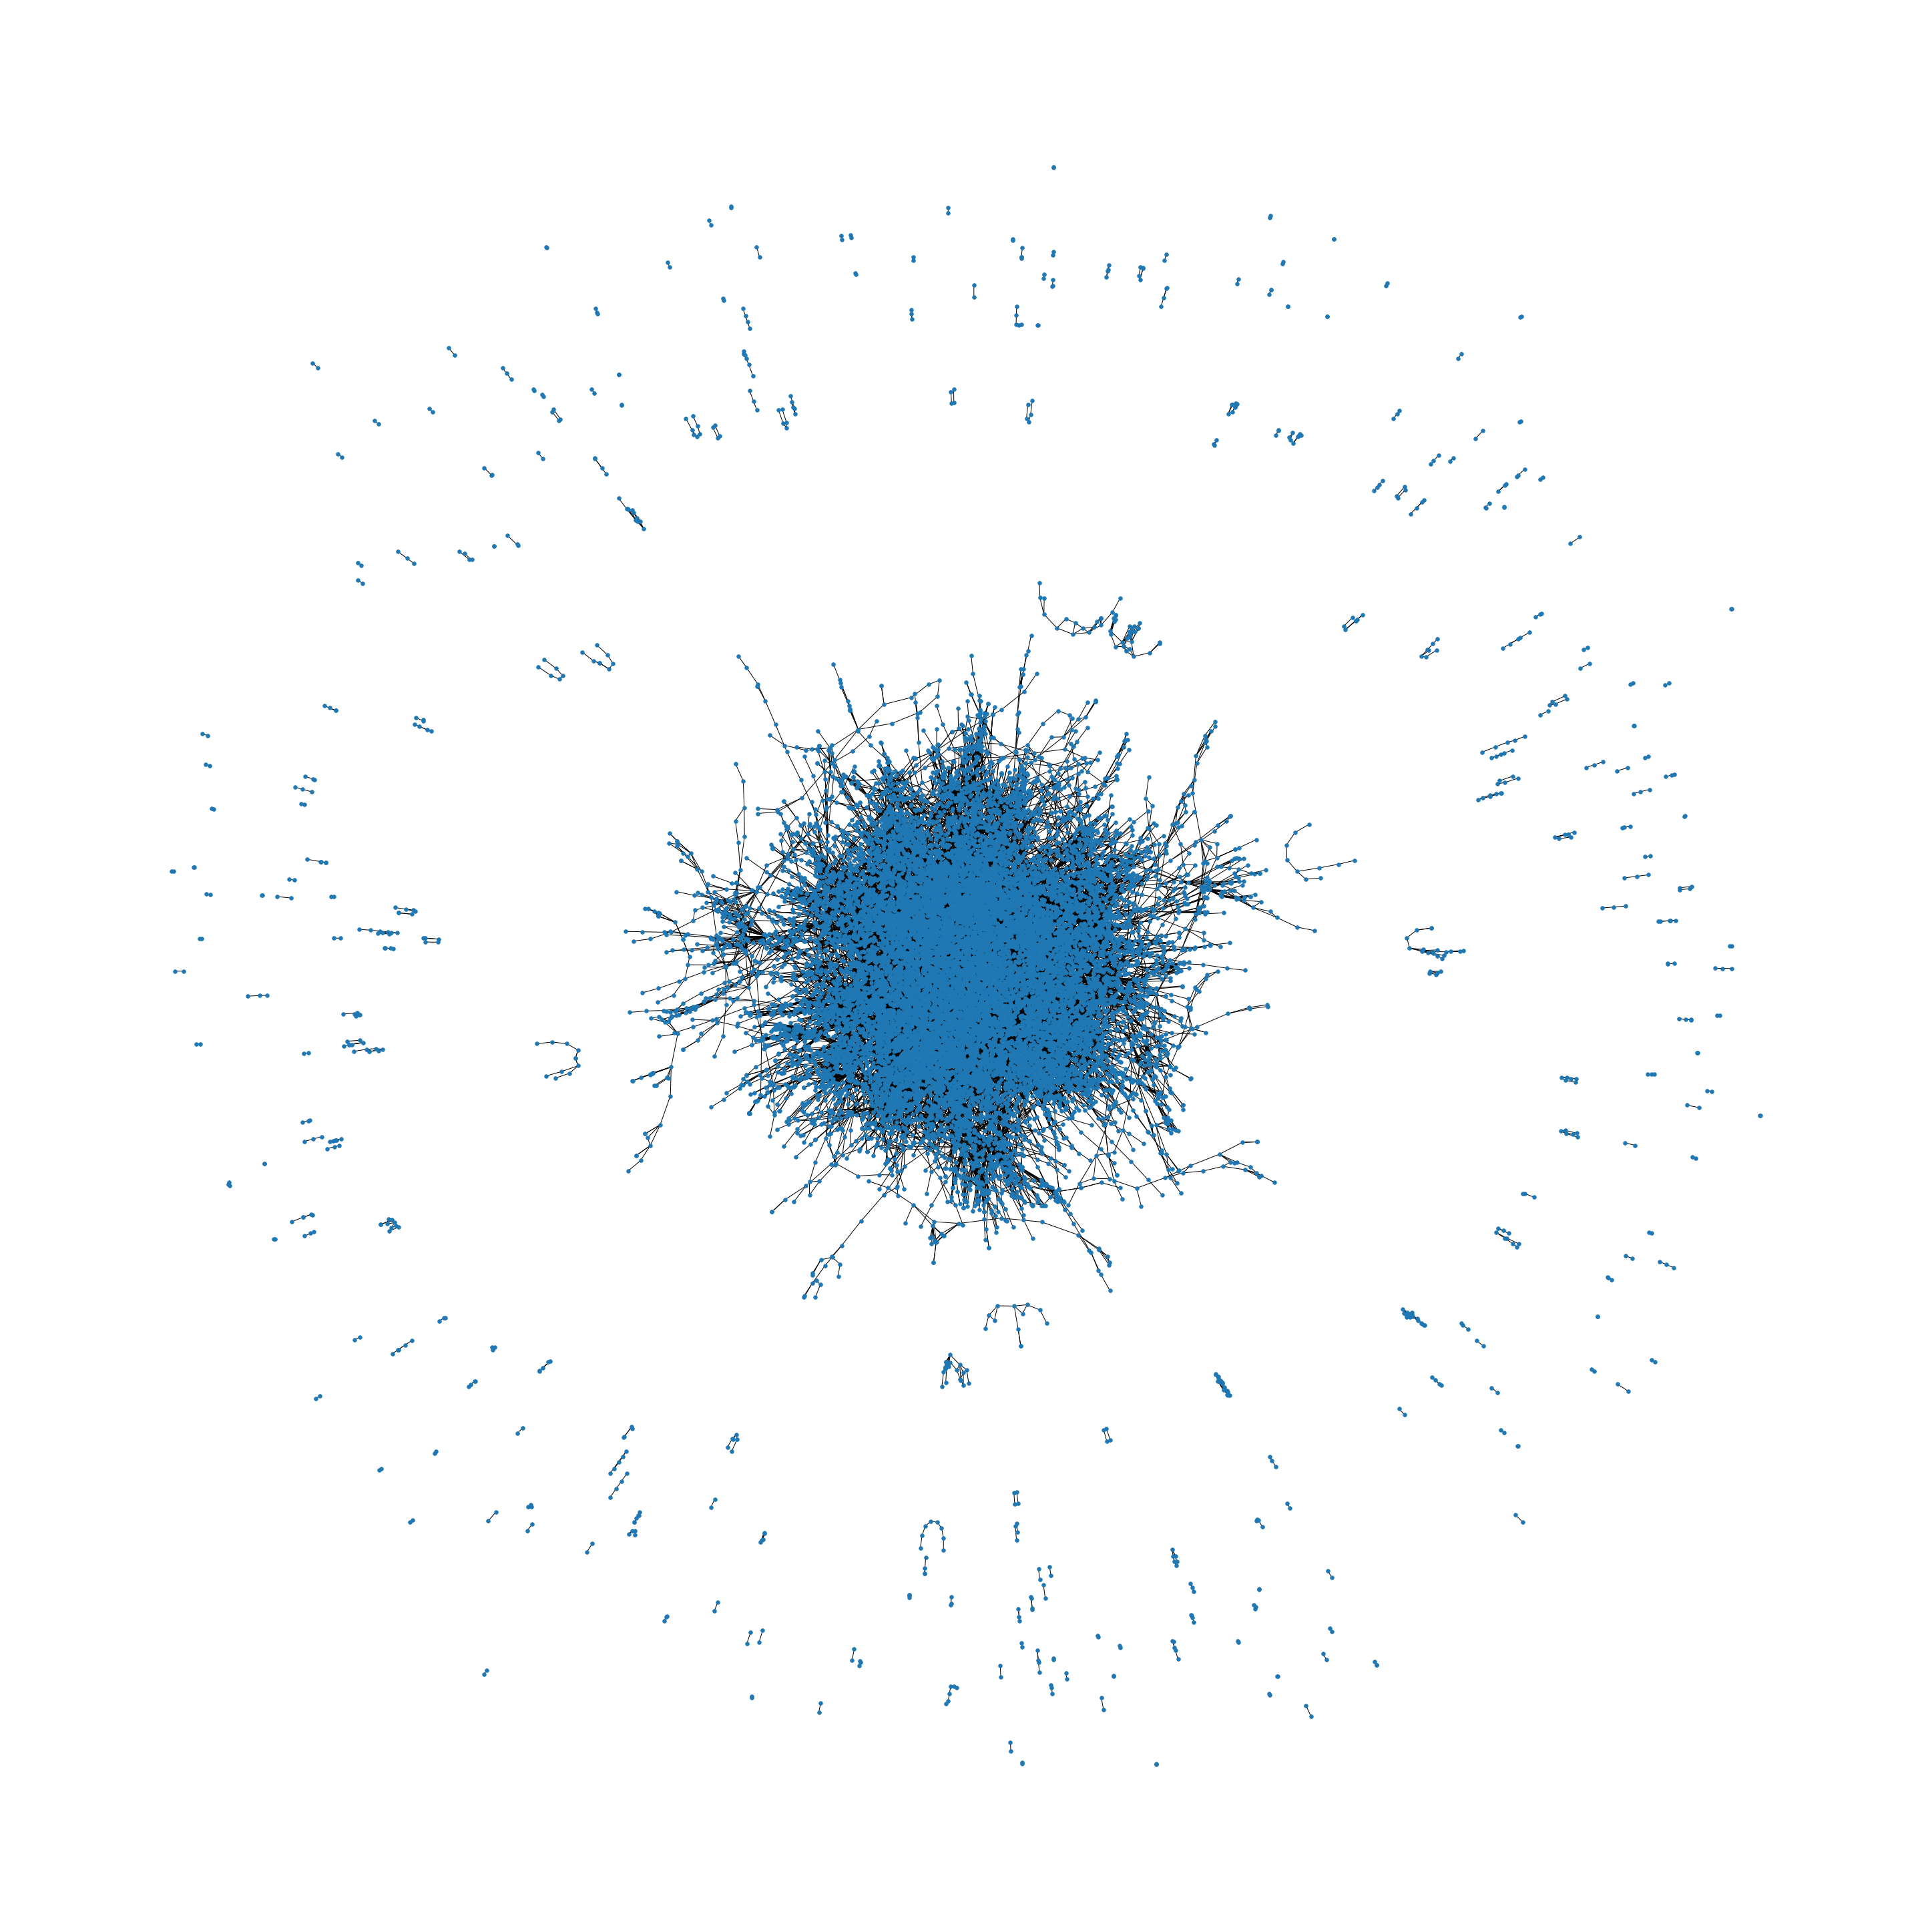

In [ ]:
fig = plt.figure(figsize=(40, 40)) 
#G = nx.fast_gnp_random_graph(10000, 0.02, seed=1337) 
nx.draw(G, node_size=30) 
plt.axis('equal') 
plt.show() 
fig.savefig('waka.svg') 

### Factor de trafico



In [ ]:
#factor de trafico
"""
1. Nombre de la calle: deben ser similares valores 
2. Velocidad y Distancia ? 
3. Costo y costo inverso
"""

"""
Time of day sera en bloques de 4h tendran un valor base de la cantidad de carros en una calle carros en la road
Las calles dependiendo de ciertas caracteristicas que aumentaran o modificaran este valor base 
de la cantidad de carros
12am  - 3am ()
4am   - 8am
9am   - 1pm
2pm   - 6pm
7pm   - 11pm
"""
car_per_block = [50, 100, 150, 200, 250]
crr_time = 0 #number between 0 - 23 => 12am - 11pm

new_df['factor_trafico'] = car_per_block[crr_time] * new_df['distancia']
#df['factor_trafico'] = df['calle_id'] % 4

TypeError: ignored

In [ ]:
new_df.head()

,id,distancia,velocidad,costo,paths,factor_trafico
calle_id,,,,,,
4827820,4827820,0.303198,70.0,0.000394,"[4827827, 4827828, 4828025, 28316968, 28317001...",15.159895
4827822,4827822,0.034784,70.0,0.000497,"[144954706, 157935082]",1.739205
4827827,4827827,1.467760,70.0,0.001398,"[4827820, 4827843, 27455459, 28316933, 2831696...",73.388015
4827828,4827828,1.459433,70.0,0.001737,"[4827820, 4827843, 42211168, 42213129, 7522693...",72.971665
4827829,4827829,0.285529,60.0,0.001190,"[4827838, 4827844, 111888318, 111925865, 14495...",14.276435


In [ ]:
from numpy import Inf
import heapq

# takes the graph and the starting node
# returns a list of distances from the starting node to every other node
def lazy_dijkstras(graph, root):
    n = len(graph)
    # set up "inf" distances
    dist = [Inf for _ in range(n)]
    # set up root distance
    dist[root] = 0
    # set up visited node list
    visited = [False for _ in range(n)]
    # set up priority queue
    pq = [(0, root)]
    # while there are nodes to process
    while len(pq) > 0:
        # get the root, discard current distance
        _, u = heapq.heappop(pq)
        # if the node is visited, skip
        if visited[u]:
            continue
        # set the node to visited
        visited[u] = True
        # check the distance and node and distance
        for v, l in graph[u]:
            # if the current node's distance + distance to the node we're visiting
            # is less than the distance of the node we're visiting on file
            # replace that distance and push the node we're visiting into the priority queue
            if dist[u] + l < dist[v]:
                dist[v] = dist[u] + l
                heapq.heappush(pq, (dist[v], v))
    return dist

In [ ]:
new_df.head()
from collections import defaultdict

g = defaultdict(list)

for index, row in new_df.iterrows():
  for i, p in enumerate(row["paths"]):
    g[row['id']].append((int(p), int((row['factor_trafico']) + 1) * (i % 5 + 1)))

In [ ]:
def test_dijkstras(graph, root):
    # set up "inf" distances

    graph.pop(1, None)

    dist = {k:Inf for k in graph.keys()}
    visited = {k:False for k in graph.keys()}
    # set up root distance
    dist[root] = 0

    # set up priority queue
    pq = [(0, root)]
    # while there are nodes to process
    while len(pq) > 0:
        # get the root, discard current distance
        _, u = heapq.heappop(pq)
        # if the node is visited, skip
        if visited[u]:
            continue
        # set the node to visited
        visited[u] = True
        # check the distance and node and distance
        for v, l in graph[u]:
            # if the current node's distance + distance to the node we're visiting
            # is less than the distance of the node we're visiting on file
            # replace that distance and push the node we're visiting into the priority queue
            if dist[u] + l < dist[v]:
                dist[v] = dist[u] + l
                heapq.heappush(pq, (dist[v], v))

    return dist

In [ ]:
test_g = defaultdict(list);
for index, row in new_df.iterrows():
  for i, p in enumerate(row["paths"]):
    test_g[int(row['id'])].append((int(p), int((row['factor_trafico']) + 1) * (i % 5 + 1)))

In [ ]:
from collections import deque

class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list
        self.H = {k:1 for k in self.adjacency_list.keys()}

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        return self.H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(n) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [ ]:
g = Graph(test_g)
g.a_star_algorithm(4827820, 4827822)

distance = test_dijkstras(test_g, 4827820)

Path found: [4827820, 118506027, 28316972, 144954712, 160393810, 144954706, 4827822]
